<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

### 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# traduzindo as colunas

data.rename(columns={"carat": "Quilate",
                     "cut": "Corte",
                     "color": "Cor",
                     "clarity": "Clareza",
                     "depth": "Profundidade",
                     "table": "Tabela",
                     "price": "Preço"}, inplace=True)
data.head()

,Quilate,Corte,Cor,Clareza,Profundidade,Tabela,Preço,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


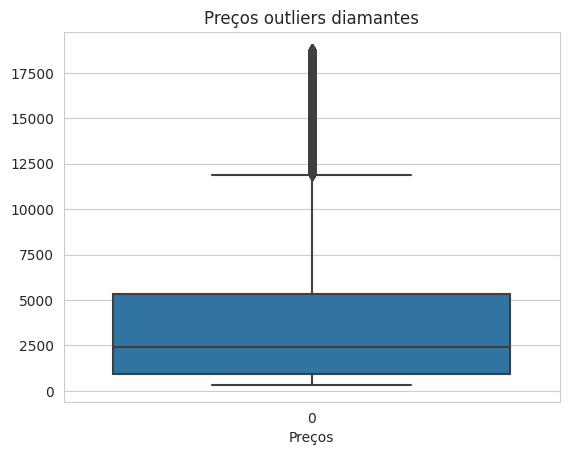

In [3]:
# gráfico do exercício 1

with sns.axes_style("whitegrid"):

    diamonds = sns.boxplot(data=data["Preço"])
    diamonds.set(title="Preços outliers diamantes", xlabel="Preços")

**Insight do gráfico 1**: Há um destaque significativamente mais caro na parte superior do que os outros diamantes no gráfico. É um diamante muito raro e valioso, com uma qualidade superior das demais.

---

### 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [4]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# traduzindo as colunas

data.rename(columns={"carat": "Quilate",
                     "cut": "Corte",
                     "color": "Cor",
                     "clarity": "Clareza",
                     "depth": "Profundidade",
                     "table": "Tabela",
                     "price": "Preço"}, inplace=True)
data.head()

,Quilate,Corte,Cor,Clareza,Profundidade,Tabela,Preço,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
correlacao = data[["Quilate", "Preço", "Clareza"]]
correlacao.head()

,Quilate,Preço,Clareza
0,0.23,326,SI2
1,0.21,326,SI1
2,0.23,327,VS1
3,0.29,334,VS2
4,0.31,335,SI2


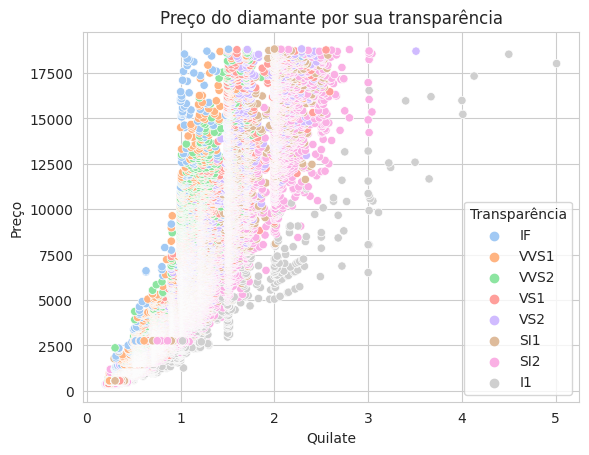

In [7]:
# gráfico do exercício 2 preco + quilate + clareza

with sns.axes_style("whitegrid"):

    diamonds = sns.scatterplot(data=correlacao, x="Quilate", y="Preço", hue="Clareza", palette="pastel")
    diamonds.set(title="Preço do diamante por sua transparência")
    diamonds.get_legend().set_title("Transparência")

**Insight do gráfico 2**: O gráfico mostra que, em geral, diamantes com maior transparência têm preços mais altos. Visualizando por esse gráfico, acredita-se que os diamantes com transparência VVS1 e VVS2 podem ter preços mais altos do que diamantes com transparência IF.

---

### 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [8]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


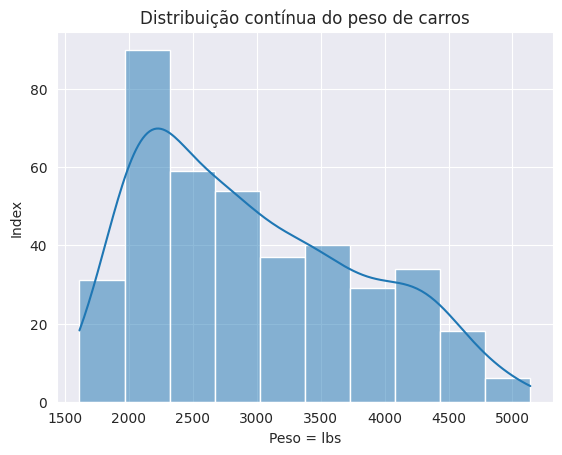

In [11]:
# gráfico do exercício 3

cars = data[["weight"]]
with sns.axes_style("darkgrid"):
    plot = sns.histplot(x="weight", data=cars,kde=True)
    plot.set(title="Distribuição contínua do peso de carros",
    xlabel="Peso = lbs",
    ylabel="Index")

**Insight do gráfico 3**: A distribuição do peso de carros é aproximadamente normal. A média do peso é de aproximadamente 2.500 libras. O desvio padrão é de aproximadamente 1.000 libras.

---